# Exercise 3: Measurement of the total production cross sections

For **each** of the seven centre-of-mass energies:
* Determine the number of events in the handronic channel *and* in the three leptonic channels
* Substract the background and correct for selection efficiencies accordingly
* Then, calculate the differnetial cross sections for the hadronic *and* the leptnic channels
* Add the radiation corrections from The table given below. **Don't forget to take the uncertainties (errors) into account!**

| $\sqrt{s}$   \[GeV\]| Correction hadronic channel    \[nb\] |  Correction leptonic channel   \[nb\]|
| --- | --- | --- |
| 88.47 | +2.0  | +0.09 |
| 89.46 | +4.3  | +0.20 |
| 90.22 | +7.7  | +0.36 |
| 91.22 | +10.8 | +0.52 |
| 91.97 | +4.7  | +0.22 |
| 92.96 | -0.2  | -0.01 |
| 93.76 | -1.6  | -0.08 |

Feel free to access these values using the dictionary 'xs_corrections' given below.
* Once the total cross section for all four decay channels at all seven energies have been measured, fit a **Breit-Wigner distribution** to measure the $Z$ boson mass ($m_Z$) and the resonance width ($\Gamma_Z$) and the peak cross section s of the resonance for the hadronic and the leptonic channels. Again, **propagate the uncertainties carefully**.
* Compare your results to the OPAL cross section s and the theoretical predictions. How many degrees of freedom does the fit have? How can you udge if the model is compatible with the measured data? Calculate the  **confidence levels**.
* Calculate the partial widths for all channels from the measured cross sections on the peak. Which is the best partial width to start with? Compare them with the theoretical predictions and the values that you have calculated in the beginning.
* Determine from your results the **number of generations of light neutrinos**. Which assumptions are necessary?
* Discuss in detail the systematic uncertainties in the whole procedure of the analysis. Which assumptions were necessary?

These are some **references** that might be interesting to look up:
* Particle Data Book: https://pdg.lbl.gov/2020/download/Prog.Theor.Exp.Phys.2020.083C01.pdf
** Resonances: https://pdg.lbl.gov/2017/reviews/rpp2017-rev-resonances.pdf
* Precision Electroweak Measurements on the Z Resonance (Combination LEP): https://arxiv.org/abs/hep-ex/0509008
* Measurement of the $Z^0$ mass and width with the OPAL detector at LEP: https://doi.org/10.1016/0370-2693(89)90705-3
* Measurement of the $Z^0$ line shape parameters and the electroweak couplings of charged leptons: https://inspirehep.net/literature/315269
* The OPAL Collaboration, *Precise Determination of the $Z$ Resonance Parameters at LEP: "Zedometry"*: https://arxiv.org/abs/hep-ex/0012018
* Fitting a Breit-Wigner curve using uproot: https://masonproffitt.github.io/uproot-tutorial/07-fitting/index.html

In [1]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

In [2]:
xs_corrections = { 'energy' : [88.4763 , 89.46658, 90.21986, 91.2291,  91.96428, 92.96229, 93.71362] ,
                      'hadronic' : [2.0, 4.3, 7.7, 10.8, 4.7, -0.2, -1.6],
                      'leptonic' : [0.09, 0.20, 0.36, 0.52, 0.22, -0.01, -0.08]}

#### Read in the OPAL data

In [3]:
path_data = 'data/'
rows = []
with open(path_data+'daten_3.csv','r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        rows.append(row)
mean_energy=np.array(list(zip(*rows[1:]))[0], dtype=float)
lumi=np.array(list(zip(*rows[1:]))[1], dtype=float)
stat=np.array(list(zip(*rows[1:]))[2], dtype=float)
sys=np.array(list(zip(*rows[1:]))[3], dtype=float)
alll=np.array(list(zip(*rows[1:]))[4], dtype=float)

In [4]:
### Open the file introducing file path
opal_data = uproot.open(path_data+'daten_3.root')
ttree_name = 'myTTree'

In [5]:
### Load branches
branches_opal = opal_data[ttree_name].arrays()

In [6]:
Nchar = ak.to_numpy(branches_opal['Ncharged'])
Pchar = ak.to_numpy(branches_opal['Pcharged'])
E_Ecal = ak.to_numpy(branches_opal['E_ecal'])
E_Hcal = ak.to_numpy(branches_opal['E_hcal'])
E_Lep = ak.to_numpy(branches_opal['E_lep'])
cos_thet = ak.to_numpy(branches_opal['cos_thet'])

The data contains events, corresponding to different energies. For a propper calculation of cross sections, those events are categorized to the energies mentioned in the csv_file.

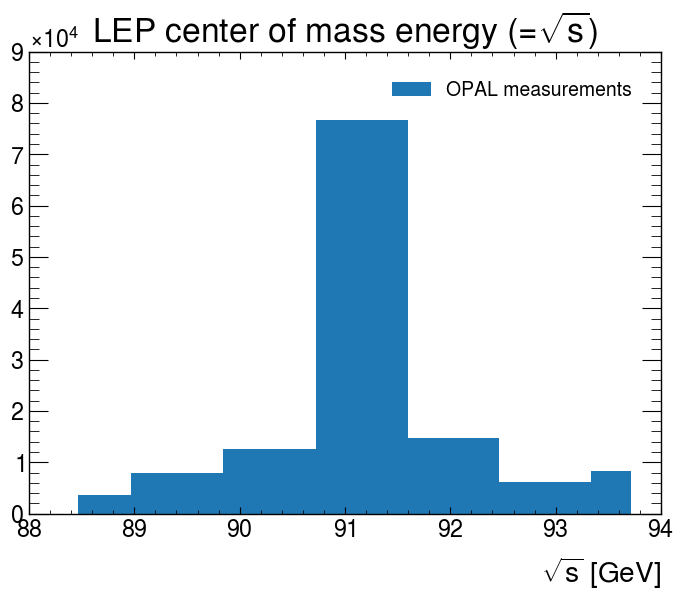

In [7]:
en_edges=[min(2*E_Lep)]
for i in range(6):
    en_edges.append((mean_energy[i]+mean_energy[i+1])/2)
    
en_edges.append(max(2*E_Lep))

# print(en_edges)
plt.style.use(mplhep.style.ATLAS) # load ATLAS plot style
plt.title(r'LEP center of mass energy (=$\sqrt{s}$)')
hbins, hedges, _ = plt.hist(2*E_Lep,bins= en_edges,label=r'OPAL measurements')

plt.xlim(88,94)
plt.xlabel(r'$\sqrt{s}$ $[GeV]$')
plt.legend()
plt.show()

In [8]:
energy_indices={'energy_1':[] ,'energy_2':[] ,'energy_3':[] ,'energy_4':[] ,'energy_5':[] ,
                'energy_6':[] ,'energy_7':[]}

i=0;
for e in 2*E_Lep:
    if e<en_edges[1]:
        energy_indices['energy_1'].append(i)
    elif e>=en_edges[1] and e<en_edges[2]:
        energy_indices['energy_2'].append(i)
    elif e>=en_edges[2] and e<en_edges[3]:
        energy_indices['energy_3'].append(i)
    elif e>=en_edges[3] and e<en_edges[4]:
        energy_indices['energy_4'].append(i)
    elif e>=en_edges[4] and e<en_edges[5]:
        energy_indices['energy_5'].append(i)
    elif e>=en_edges[5] and e<en_edges[6]:
        energy_indices['energy_6'].append(i)
    elif e>=en_edges[6]:
        energy_indices['energy_7'].append(i)
    i+=1;